<a href="https://colab.research.google.com/github/2022yingjie/Machine_Learning-xitutu/blob/main/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.基本概念
> 1.1 K-均值算法，是无监督学习中的聚类算法。

> 1.2 k-means算法比较简单。在k-means算法中，用cluster来表示簇；容易证明k-means算法收敛等同于所有质心不再发生变化。基本的k-means算法流程如下：
* 选取k个初始质心（作为初始cluster，每个初始cluster只包含一个点）；  
* repeat：  
** 对每个样本点，计算得到距其最近的质心，将其类别标为该质心所对应的cluster；  
** 重新计算k个cluster对应的质心（质心是cluster中样本点的均值）；  
* until 质心不再发生变化  



# 2.目标函数
> repeat的次数决定了算法的迭代次数。实际上，k-means的本质是最小化目标函数，目标函数为每个点到其簇质心的距离的平方和,公式如下：$$Loss=\sum_{n=1}^{N}(argmin(||x_{n}-c_{j}||^{2}),   j∈Classes$$

> $N$是元素个数，$x_{n}$表示元素，$c_{j}$表示第j簇的质心。

# 3.算法特点
> 3.1 时间复杂度$O(nkt)$,$n$是元素个数，$t$代表迭代次数，$k$代表cluster的数量，即类别数。

> 3.2 优点：1）简单高效；2）适用于大规模数据集；3）时间复杂度近似于线性。

> 3.3 缺点：1）k-means是局部最优，因而对初始质心的选取敏感；2）选择能达到目标函数最优的k值是非常困难的。

In [ ]:
# 代码实现
def kMeans(dataSet, k):
    '''
    KMeans算法，返回最终的质心坐标和每个点所在的簇
    '''
    m = np.shape(dataSet)[0] # m表示数据集的长度（个数）
    clusterAssment = np.mat(np.zeros((m,2)))

    centroids = randCent(dataSet, k) # 保存k个初始质心的坐标
    clusterChanged = True
    iterIndex=1 # 迭代次数
    while clusterChanged:
        clusterChanged = False # 判断是否需要继续迭代，这里没有设置迭代次数，也就是，直到最优才退出循环
        for i in range(m):
            minDist = np.inf; minIndex = -1
            for j in range(k):
                distJI = np.linalg.norm(np.array(centroids[j,:])-np.array(dataSet[i,:]))
                if distJI < minDist:
                    minDist = distJI; minIndex = j
            if clusterAssment[i,0] != minIndex: clusterChanged = True
            clusterAssment[i,:] = minIndex,minDist**2
            print("第%d次迭代后%d个质心的坐标:\n%s"%(iterIndex,k,centroids)) # 第一次迭代的质心坐标就是初始的质心坐标
            iterIndex+=1
        for cent in range(k):
            ptsInClust = dataSet[np.nonzero(clusterAssment[:,0].A==cent)[0]]#get all the point in this cluster
            centroids[cent,:] = np.mean(ptsInClust, axis=0)
    return centroids, clusterAssment

所有样本距离聚簇中心点的总距离和: 2593.085039826475
距离聚簇中心点的平均距离: 1.7287233598843168
聚簇中心点: [[ 4.35273381e+00  1.33392752e+00]
 [-6.36176159e+00  6.94997331e+00]
 [-7.44342199e+00 -2.00152176e+00]
 [ 5.80990378e+00 -5.70703661e-03]]


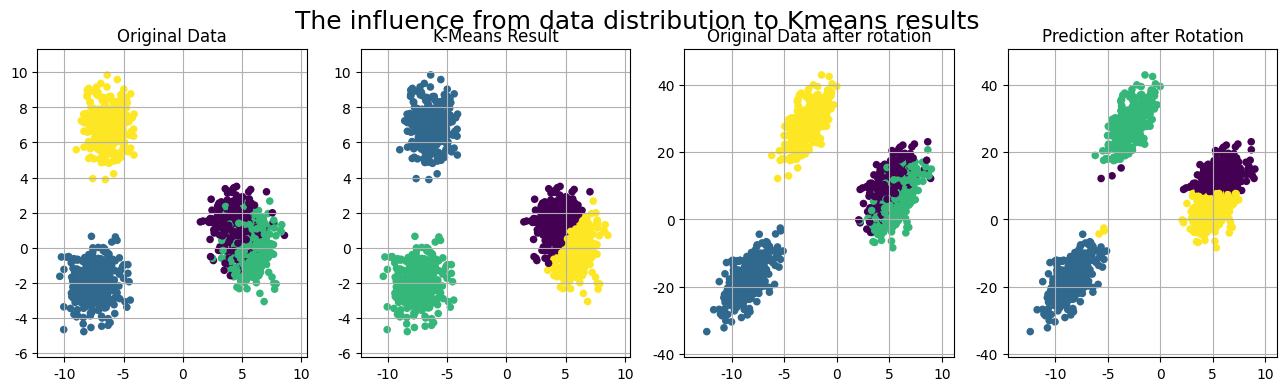

In [15]:
#!/usr/bin/env python
# -*- coding:utf-8 -*-
# Author:ZhengzhengLiu

#k-means聚类算法

import numpy as np
import pandas as pd
# import matplotlib as mpl
import matplotlib.pyplot as plt
# import matplotlib.colors
import sklearn.datasets as ds
from sklearn.cluster import KMeans      #引入kmeans
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()
# #解决中文显示问题
# mpl.rcParams['font.sans-serif'] = [u'SimHei']
# mpl.rcParams['axes.unicode_minus'] = False

#产生模拟数据
N = 1500
centers = 4
#make_blobs:聚类数据生成器
data,y = ds.make_blobs(N,n_features=2,centers=centers,random_state=28)

data2,y2 = ds.make_blobs(N,n_features=2,centers=centers,random_state=28)
data3 = np.vstack((data[y==0][:200],data[y==1][:100],data[y==2][:10],data[y==3][:50]))
y3 = np.array([0]*200+[1]*100+[2]*10+[3]*50)

#模型的构建######## 重点看这里
km = KMeans(n_clusters=centers,random_state=28)
km.fit(data,y)
y_hat = km.predict(data)
print("所有样本距离聚簇中心点的总距离和:",km.inertia_)
print("距离聚簇中心点的平均距离:",(km.inertia_/N))
print("聚簇中心点:",km.cluster_centers_)

y_hat2 = km.fit_predict(data2)
y_hat3 = km.fit_predict(data3)

def expandBorder(a, b):
    d = (b - a) * 0.1
    return a-d, b+d

#画图
# cm = mpl.colors.ListedColormap(list("rgbmyc"))
plt.figure(figsize=(16,4),facecolor="w")
plt.subplot(141)
plt.scatter(data[:,0],data[:,1],c=y,s=30,edgecolors="none")

x1_min,x2_min = np.min(data,axis=0)
x1_max,x2_max = np.max(data,axis=0)
x1_min,x1_max = expandBorder(x1_min,x1_max)
x2_min,x2_max = expandBorder(x2_min,x2_max)
plt.xlim((x1_min,x1_max))
plt.ylim((x2_min,x2_max))
plt.title("Original Data")
plt.grid(True)

plt.subplot(142)
plt.scatter(data[:, 0], data[:, 1], c=y_hat, s=30, edgecolors='none')
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.title('K-Means Result')
plt.grid(True)

m = np.array(((1, 1), (0.5, 5)))
data_r = data.dot(m)
y_r_hat = km.fit_predict(data_r)
plt.subplot(143)
plt.scatter(data_r[:, 0], data_r[:, 1], c=y, s=30, edgecolors='none')

x1_min, x2_min = np.min(data_r, axis=0)
x1_max, x2_max = np.max(data_r, axis=0)
x1_min, x1_max = expandBorder(x1_min, x1_max)
x2_min, x2_max = expandBorder(x2_min, x2_max)

plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.title('Original Data after rotation')
plt.grid(True)

plt.subplot(144)
plt.scatter(data_r[:, 0], data_r[:, 1], c=y_r_hat, s=30, edgecolors='none')
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.title('Prediction after Rotation')
plt.grid(True)

# plt.subplot(245)
# plt.scatter(data2[:, 0], data2[:, 1], c=y2, s=30, cmap=cm, edgecolors='none')
# x1_min, x2_min = np.min(data2, axis=0)
# x1_max, x2_max = np.max(data2, axis=0)
# x1_min, x1_max = expandBorder(x1_min, x1_max)
# x2_min, x2_max = expandBorder(x2_min, x2_max)
# plt.xlim((x1_min, x1_max))
# plt.ylim((x2_min, x2_max))
# plt.title('Original Data with different variance')
# plt.grid(True)

# plt.subplot(246)
# plt.scatter(data2[:, 0], data2[:, 1], c=y_hat2, s=30, cmap=cm, edgecolors='none')
# plt.xlim((x1_min, x1_max))
# plt.ylim((x2_min, x2_max))
# plt.title('不同方差簇数据的K-Means算法聚类结果')
# plt.grid(True)

# plt.subplot(247)
# plt.scatter(data3[:, 0], data3[:, 1], c=y3, s=30, cmap=cm, edgecolors='none')
# x1_min, x2_min = np.min(data3, axis=0)
# x1_max, x2_max = np.max(data3, axis=0)
# x1_min, x1_max = expandBorder(x1_min, x1_max)
# x2_min, x2_max = expandBorder(x2_min, x2_max)
# plt.xlim((x1_min, x1_max))
# plt.ylim((x2_min, x2_max))
# plt.title('不同簇样本数量原始数据图')
# plt.grid(True)

# plt.subplot(248)
# plt.scatter(data3[:, 0], data3[:, 1], c=y_hat3, s=30, cmap=cm, edgecolors='none')
# plt.xlim((x1_min, x1_max))
# plt.ylim((x2_min, x2_max))
# plt.title('不同簇样本数量的K-Means算法聚类结果')
# plt.grid(True)

#plt.tight_layout(2)
plt.suptitle('The influence from data distribution to Kmeans results', fontsize=18)
# plt.savefig("k-means聚类算法.png")
plt.show()

# #运行结果：
# 所有样本距离聚簇中心点的总距离和: 2592.9990199
# 距离聚簇中心点的平均距离: 1.72866601327
# 聚簇中心点: [[ -7.44342199e+00  -2.00152176e+00]
#  [  5.80338598e+00   2.75272962e-03]
#  [ -6.36176159e+00   6.94997331e+00]
#  [  4.34372837e+00   1.33977807e+00]]